In [9]:
import pandas as pd
import cuzcatlan as cusca
import seaborn as sns

In [2]:
# loading patient data from netanely et al.
netanely = pd.read_excel('13058_2016_724_MOESM2_ESM.xlsx',sheet_name='RNA-Seq 1148')
netanely.set_index('Sample ID', inplace=True)
netanely

,Cluster ID,Age (Median),ER Status,PR Status,Her2 Status,PAM50,Pathologic stage,Histological type
Sample ID,,,,,,,,
TCGA-BH-A0C7-01,1,48,Positive,Negative,Positive,LumB,Stage II,Infiltrating Ductal Carcinoma
TCGA-A8-A06N-01,1,66,Positive,Negative,Negative,LumB,Stage III,Infiltrating Ductal Carcinoma
TCGA-D8-A1XU-01,1,56,Positive,Positive,Negative,LumA,Stage I,Infiltrating Ductal Carcinoma
TCGA-AR-A0TV-01,1,66,Positive,Positive,Negative,LumB,Stage II,Infiltrating Ductal Carcinoma
TCGA-D8-A1XV-01,1,84,Positive,Positive,Negative,LumA,Stage II,Mucinous Carcinoma
TCGA-AN-A03Y-01,1,66,Positive,Positive,Negative,LumB,Stage II,Infiltrating Ductal Carcinoma
TCGA-A8-A08I-01,1,53,Positive,Positive,Negative,LumB,Stage II,Infiltrating Ductal Carcinoma
TCGA-E9-A1N3-01,1,70,NaN,NaN,Negative,LumA,Stage III,Mixed Histology
TCGA-C8-A1HE-01,1,59,Positive,Positive,Negative,LumA,Stage II,Infiltrating Ductal Carcinoma


In [3]:
# We will comapre this with normalized RNA Seq counts
rna_samples_name = 'selected_patients.gct'  #For now we will use these, but we will then swap for all ~1100 samples
all_rna_samples = pd.read_table(rna_samples_name, skiprows=2, index_col=0)
# Now var filter and choose two 2000
rna = all_rna_samples.loc[all_rna_samples.var(axis=1).sort_values(ascending=False).iloc[:200].index]

# Delete this once columns need no renaming
rna.columns = [i[0:15] for i in list(rna)]
rna

,Description,TCGA-A7-A0D9-01,TCGA-A7-A0D9-11,TCGA-A7-A0DB-01,TCGA-A7-A0DB-11,TCGA-A7-A0DC-01,TCGA-A7-A0DC-11,TCGA-A7-A13E-01,TCGA-A7-A13E-11,TCGA-A7-A13G-01,...,TCGA-BH-A0BW-01,TCGA-BH-A0BW-11,TCGA-BH-A0C0-01,TCGA-BH-A0C0-11,TCGA-BH-A0DO-01,TCGA-BH-A0DO-11,TCGA-BH-A0HA-01,TCGA-BH-A0HA-11,TCGA-E2-A158-01,TCGA-E2-A158-11
Name,,,,,,,,,,,,,,,,,,,,,
7SK,7SK,138.0,98.0,2236683.0,86.0,7381501.0,85.0,214131.0,109.0,1159758.0,...,149.0,89.0,35.0,919.0,610.0,490.0,437.0,160.0,912.0,104.0
MT-RNR2,MT-RNR2,443592.0,824251.0,245460.0,558996.0,3135815.0,374864.0,378842.0,519795.0,4581345.0,...,115945.0,281769.0,242537.0,432825.0,266903.0,352853.0,336193.0,253663.0,860728.0,410018.0
MALAT1,MALAT1,21399.0,7973.0,336492.0,5234.0,593282.0,8645.0,536008.0,5081.0,3032167.0,...,8064.0,13496.0,4890.0,12058.0,15497.0,9428.0,5768.0,12817.0,10321.0,4998.0
MT-RNR1,MT-RNR1,57532.0,93087.0,27350.0,58315.0,527454.0,25485.0,194468.0,56010.0,2448255.0,...,11122.0,22374.0,36066.0,72303.0,23338.0,37317.0,51287.0,37559.0,85449.0,50613.0
RN7SL2,RN7SL2,334.0,200.0,1495153.0,220.0,1929507.0,159.0,26417.0,254.0,170127.0,...,867.0,234.0,318.0,237.0,311.0,311.0,1148.0,847.0,678.0,300.0
MT-CO1,MT-CO1,432658.0,854335.0,62883.0,800572.0,20691.0,586034.0,683130.0,713130.0,358299.0,...,208330.0,423736.0,283880.0,408228.0,530260.0,460598.0,607138.0,269036.0,764154.0,589841.0
MT-ND4,MT-ND4,580641.0,1174696.0,5755.0,693400.0,5393.0,667353.0,405593.0,737860.0,220338.0,...,187146.0,389871.0,287175.0,316156.0,356271.0,359317.0,347789.0,390283.0,637250.0,677270.0
CPB1,CPB1,357.0,292.0,9.0,325.0,60191.0,31129.0,10.0,287.0,429.0,...,0.0,749.0,134.0,3883.0,1264.0,11265.0,1656272.0,44.0,12.0,433.0
LTF,LTF,719.0,2024.0,34116.0,714.0,187.0,74358.0,27.0,12520.0,57289.0,...,1144.0,169571.0,393.0,57635.0,1356618.0,105360.0,1823.0,24511.0,96.0,1117.0


----------------------------------------------------------------------
The PDF of this heatmap can be downloaded here:


----------------------------------------------------------------------
The CDF which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
The ATR which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
Done with Hierarchical Clustering!


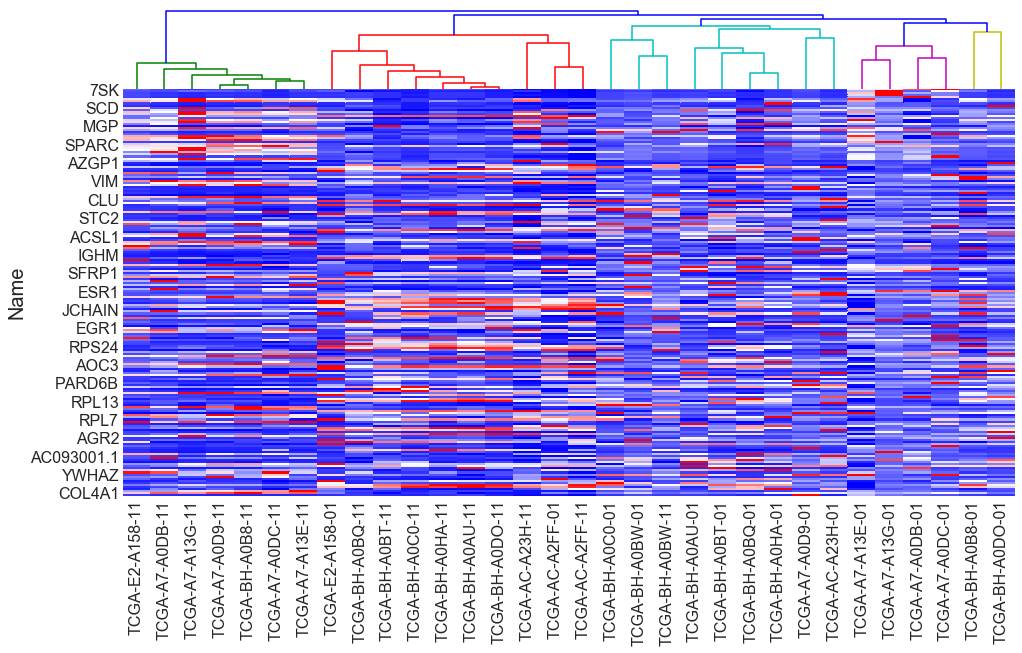

In [4]:
cusca.HierarchicalClustering(pwd = '.',
                              gct_name = rna,
                              col_distance_metric = 'pearson',
                              row_distance_metric = 'No_row_clustering',
                              clustering_method = 'average',#'complete',
                              output_base_name = 'HC_output',
                              row_normalization = True,
                              col_normalization = True,
                              row_centering = 'Mean',
                              col_centering = 'Mean',
                              output_distances=False,
                              custom_plot = 'Samples',
                              clusters_to_highlight = 5,
                              show = True)
print("Done with Hierarchical Clustering!")

In [5]:
f = open('HC_output.cls')
f.readline()
f.readline()
hc_clusters = f.readline().strip('\n').split(' ')

In [6]:
hc_df = pd.DataFrame(columns=list(rna))
hc_df.loc['hc_clusters',:] = hc_clusters
hc_df

,TCGA-A7-A0D9-01,TCGA-A7-A0D9-11,TCGA-A7-A0DB-01,TCGA-A7-A0DB-11,TCGA-A7-A0DC-01,TCGA-A7-A0DC-11,TCGA-A7-A13E-01,TCGA-A7-A13E-11,TCGA-A7-A13G-01,TCGA-A7-A13G-11,...,TCGA-BH-A0BW-01,TCGA-BH-A0BW-11,TCGA-BH-A0C0-01,TCGA-BH-A0C0-11,TCGA-BH-A0DO-01,TCGA-BH-A0DO-11,TCGA-BH-A0HA-01,TCGA-BH-A0HA-11,TCGA-E2-A158-01,TCGA-E2-A158-11
hc_clusters,2,0,3,0,4,0,3,0,3,0,...,2,2,2,1,5,1,2,1,1,0


In [7]:
netanely_ids = netanely[['Cluster ID','PAM50']].transpose()[list(hc_df)]
netanely_ids

Sample ID,TCGA-A7-A0D9-01,TCGA-A7-A0D9-11,TCGA-A7-A0DB-01,TCGA-A7-A0DB-11,TCGA-A7-A0DC-01,TCGA-A7-A0DC-11,TCGA-A7-A13E-01,TCGA-A7-A13E-11,TCGA-A7-A13G-01,TCGA-A7-A13G-11,...,TCGA-BH-A0BW-01,TCGA-BH-A0BW-11,TCGA-BH-A0C0-01,TCGA-BH-A0C0-11,TCGA-BH-A0DO-01,TCGA-BH-A0DO-11,TCGA-BH-A0HA-01,TCGA-BH-A0HA-11,TCGA-E2-A158-01,TCGA-E2-A158-11
Cluster ID,1,5,2,5,1,5,4,5,1,5,...,4,5,3,5,5,5,2,5,4,5
PAM50,LumA,Normal,LumA,Normal,LumA,Normal,Basal,Normal,LumA,Normal,...,Basal,Normal,LumB,Normal,LumA,Normal,LumA,Normal,Basal,Normal


In [17]:
hc_df.loc['Cluster ID'] = netanely_ids.loc['Cluster ID']
hc_df.loc['PAM50'] = netanely_ids.loc['PAM50']

In [18]:
hc_df

,TCGA-A7-A0D9-01,TCGA-A7-A0D9-11,TCGA-A7-A0DB-01,TCGA-A7-A0DB-11,TCGA-A7-A0DC-01,TCGA-A7-A0DC-11,TCGA-A7-A13E-01,TCGA-A7-A13E-11,TCGA-A7-A13G-01,TCGA-A7-A13G-11,...,TCGA-BH-A0BW-01,TCGA-BH-A0BW-11,TCGA-BH-A0C0-01,TCGA-BH-A0C0-11,TCGA-BH-A0DO-01,TCGA-BH-A0DO-11,TCGA-BH-A0HA-01,TCGA-BH-A0HA-11,TCGA-E2-A158-01,TCGA-E2-A158-11
hc_clusters,2,0,3,0,4,0,3,0,3,0,...,2,2,2,1,5,1,2,1,1,0
Cluster ID,1,5,2,5,1,5,4,5,1,5,...,4,5,3,5,5,5,2,5,4,5
PAM50,LumA,Normal,LumA,Normal,LumA,Normal,Basal,Normal,LumA,Normal,...,Basal,Normal,LumB,Normal,LumA,Normal,LumA,Normal,Basal,Normal
